# Bonusuppgifter

1. Dela in ursprungsdatan slumpmässigt så att:
- 100 är träningsdata (50 Pikachu, 50 Pichu)
- 50 är testdata (25 Pikachu, 25 Pichu)
  
2. Beräkna noggranheten genom följande formel:
accuracy = (#TP+#TN)/(total) där 

                Pikachu     Pichu 
                actual      actual 
___
Pikachu
predicted  &ensp; TP  &emsp;     &emsp;    FP
___


Pichu
predicted       &emsp;    FN   &emsp;      &emsp;TN

*Här har vi låtit Pikachu vara positiv och Pichu vara "icke-Pikachu" dvs negativ*

3. Upprepa uppgift 3 och 4 tio gånger, plotta en graf över accuracy och rapportera medelaccuracy.

Medelaccuracy är 0.5075008438751316


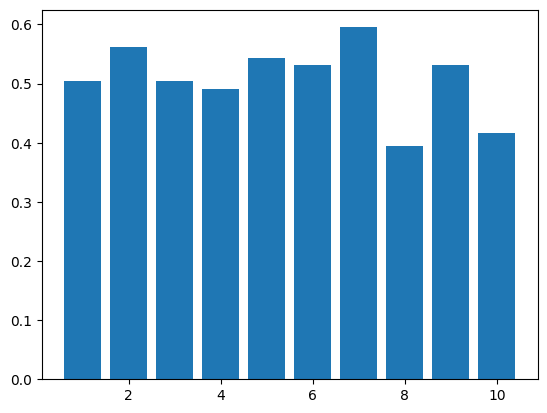

In [2]:
import random
import matplotlib.pyplot as plt
import math
import numpy

klass=['Pichu','Pikachu']
def pythagora(b,c):		# calculate hypotenusa
	x0,y0 = b
	x1,y1 = c
	return math.sqrt((x0-x1)**2+(y0-y1)**2)
def label(point,data):	#return label from nearest datapoint
	short = pythagora(point,[data[0][0],data[0][1]])	# initiate short with first distance
	typ = data[0][2]			# initiate typ with first datapoint label
	for datapoint in data:		# iterate each datapoint
		dist = pythagora(point, [datapoint[0],datapoint[1]])# calculate distance for each testpoint
		if dist < short:		# short take new value if is nearest
			short = dist		# typ take label from nearest	
			typ = datapoint[2]
	return typ							

#start bonus
def nogranheten():
	new_datapoints = []		# random 50-Pichu and 50-Pikachu 
	for i in range(50):		# iterate 50
		for k in klass:		# every type
			new_datapoints.append([random.uniform(16.5,28),random.uniform(28.5,40.5),k]) #append one random point for every type
	random.shuffle(new_datapoints)	# shuffle list

	T=0		#T=True Pikachu + True Pichu (25+25)
	total=0		#total tries - uppgift 4
	new_testpoints = []	# random testpoints 25-near Pichu and 25 near Pikachu
	for k in klass:		# every type
		n=0				# n-initiate counter
		while n<25:		# repeat untill reach 25
			p = [random.uniform(16.5,28),random.uniform(28.5,40.5)]		#p-random point
			total += 1	# increment total
			if label(p,new_datapoints) == k:   # test if p is near type k (use function label)
				new_testpoints.append(p)	# add to list
				T +=1					# increment true
				n +=1					# increment counter
	random.shuffle(new_testpoints)		# shuffle list
	return T/total
	
accuracy = []
	
for i in range(10):
	accuracy.append(nogranheten())
plt.bar(range(1,11),accuracy)
print('Medelaccuracy är ' + str(numpy.average(accuracy)))
plt.show()
